In [35]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import datetime as dt
plt.rcParams['axes.facecolor']='w'
plt.rcParams['figure.facecolor'] = 'w'
import math
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (16,8)

In [2]:
scored_full = TweetsDataFrame.read_csv('./scored_tweets/scored_270_4528_sorted.csv')

In [ ]:
scored_full['score'] = scored_full['score_neg']+scored_full['score_pos']
scored_full.loc[(scored_full['score'] <= 4) & (scored_full['score'] >= 0), 'score'] = 0

In [66]:
scored_full['weighted_score'] = (scored_full['favoriteCount'] + scored_full['retweetCount'] + 1)*np.sign((scored_full['score']))

In [67]:
scored_signed = scored_full.filter(['candidate_ref', 'weighted_score'])

In [68]:
def get_popu(df):
    popu = df.groupby('candidate_ref').sum()['weighted_score']
    popu.name = df.index.max()
    return pd.DataFrame(popu).transpose()

In [69]:
def generate_popularity_df(dataframe, bdate, edate, step):
    popu = pd.DataFrame()
    time = bdate
    end = edate
    time_step = step
    while time < end:
        new_popu = get_popu(dataframe[time-2*time_step:time])
        if popu.empty:
            popu = new_popu
        else:
            popu = popu.append(new_popu)
        time += time_step
    return popu

In [70]:
begin = constants.STARTDATE
end = constants.FIRST_ROUND
step = dt.timedelta(days=1)
popularity_signed = generate_popularity_df(scored_signed, begin, end-step, step)

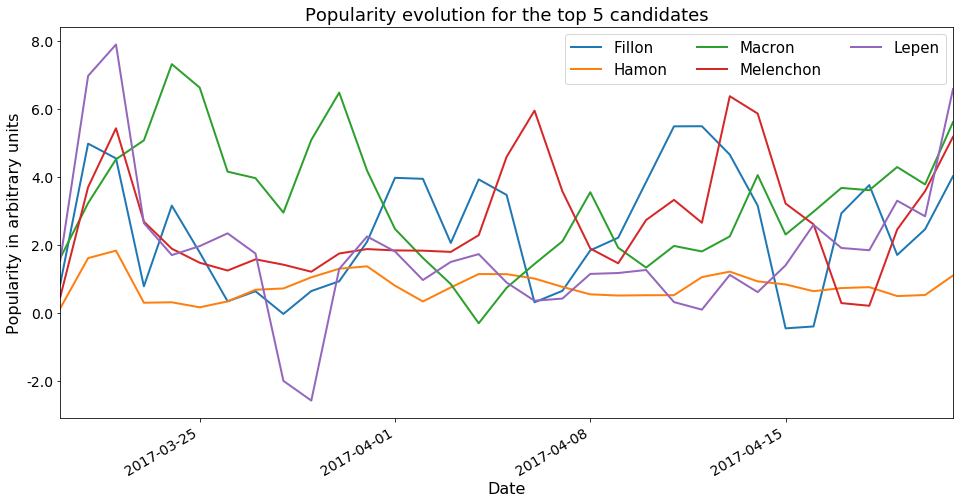

In [82]:
f,a = plt.subplots()
popularity_signed.filter(['Fillon', 'Hamon', 'Macron','Melenchon', 'Lepen']).plot(ax=a)
a.legend(loc='upper right', ncol=3, fontsize=15)
a.set_title('Popularity evolution for the top 5 candidates')
#plt.xticks
a.set_yticklabels([i/10000 for i in a.get_yticks()])
a.set_xlabel('Date', fontsize=16)
a.set_ylabel('Popularity in arbitrary units', fontsize=16)
plt.show()

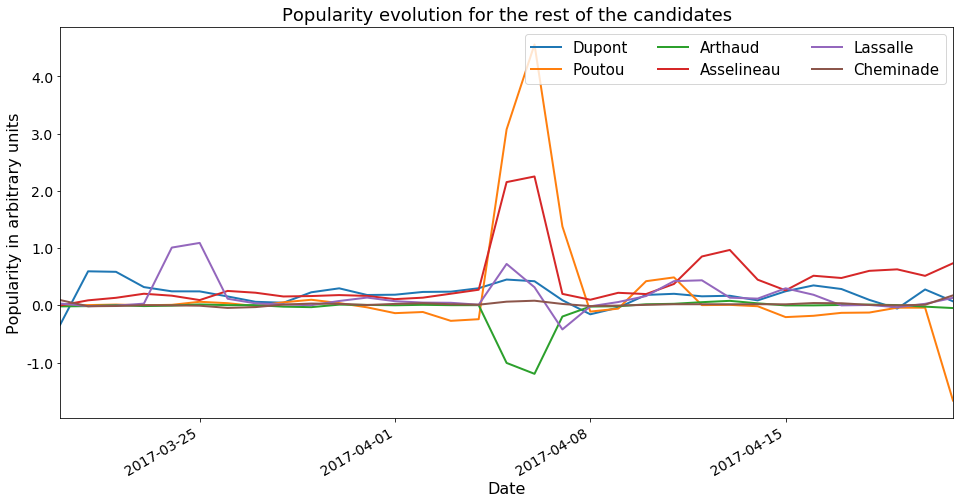

In [86]:
f,a = plt.subplots()

popularity_signed.filter(['Dupont', 'Poutou', 'Arthaud','Asselineau', 'Lassalle', 'Cheminade']).plot(ax=a)
a.legend(loc='upper right', ncol=3, fontsize=15)
a.set_title('Popularity evolution for the rest of the candidates')
a.set_xlabel('Date', fontsize=16)
a.set_ylabel('Popularity in arbitrary units', fontsize=16)
a.set_yticklabels([i/10000 for i in a.get_yticks()])


plt.show()

## Second round

In [25]:
second_round = scored_full[constants.FIRST_ROUND+dt.timedelta(days=1):]
second_round['score'] = second_round['score_pos']+second_round['score_neg']

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [31]:
## Filtering neutral zone
second_round = second_round[(second_round['score']<0) | (second_round['score']>4)]
## Filtering Macron or Lepen
second_round = second_round[(second_round['candidate_ref'] == 'Macron') | (second_round['candidate_ref'] == 'Lepen')]

In [33]:
begin = constants.FIRST_ROUND
end = constants.SECOND_ROUND
step = dt.timedelta(days=1)
popularity_2nd = generate_popularity_df(second_round, begin, end-step, step)

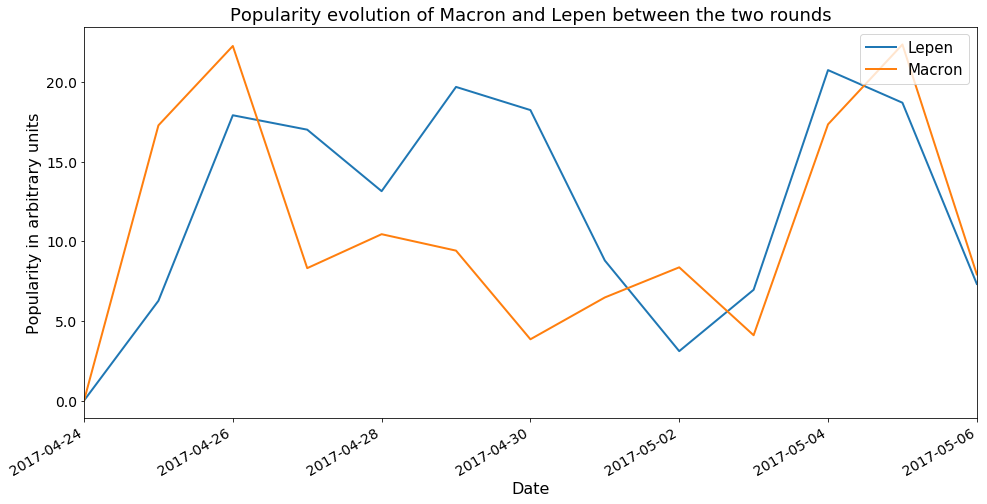

In [81]:
f,a = plt.subplots()
popularity_2nd.plot(ax=a)
a.legend(loc='upper right', fontsize=15)
a.set_title('Popularity evolution of Macron and Lepen between the two rounds')
a.set_xlabel('Date', fontsize=16)
a.set_ylabel('Popularity in arbitrary units', fontsize=16)
a.set_yticklabels([i/10000 for i in a.get_yticks()])
plt.show()
